# I. Problem Description

# II. Analyzing  the signal
## 1. Preprocess the Data and perform preliminary descriptions

- Perform missing value analysis. 

- Conduct a plausibility check to ensure data integrity.

---

## 2. Perform Statistical Analysis and Visualizations

- Analyze the **Voltage / V** signal using descriptive statistics. 

- Generate appropriate visualizations for better understanding.

---

## 3. Develop a Classification Method

- Classify the time-series signal into two modes: **"on"** and **"off"**. 
    
- Use an appropriate classification method.

# III. Method for Fast Mode Detection using Maximum Likelihood Estimation (MLE): Sliding Window Analysis

# IV. Project Outlook: Advancing Signal Detection and Analysis


# I. Problem Description 


- We have a time series signal that switches between two modes: **on** (e.g., at *t = 0s*) and **off** (e.g., at *t = 0.001504s*).

- These modes correspond to different signal values.

- Our goal is to develop a method for correct mode detection.

- This will be done by the following steps:

  - Descriptive analysis of the signal in order to visually identify a mode detection if possible  
  - First method for mode detection  
  - Method for fast mode detection  
  - Suggestions for improvement  




In [1]:
# Import the necessary libraries and load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans


C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
def analyze_signal():
    """analyze_signal"""
    print("II. Analyze the Signal")
    print()
analyze_signal()

#  Load the dataset and preview the first 5 observations
df = pd.read_excel('C:/Users/Admin/Desktop/3dstatisticallearning/Use Cases/Use Cases Machine Learning/Findiq/data.xlsx')

# Display the first 5 rows of the data

def inspect_Data():
    """Display the first 5 rows of the data"""
    print("Display the first 5 rows of the data")
    print()
    
inspect_Data()


print(df.head())

II. Analyze the Signal

Display the first 5 rows of the data

   time / s  Voltage / V
0  0.000000    32.062439
1  0.000016    36.055511
2  0.000025    36.235344
3  0.000026    39.962482
4  0.000029    37.336311


# II. Analyzing the Signal

We analyze the signal through the following four steps:

---

## 1. Preprocess the Data and perform preliminary descriptions

- Perform missing value analysis. 

- Conduct a plausibility check to ensure data integrity.

---

## 2. Perform Statistical Analysis and Visualizations

- Analyze the **Voltage / V** signal using descriptive statistics. 

- Generate appropriate visualizations for better understanding.

---

## 3. Develop a Classification Method

- Classify the time-series signal into two modes: **"on"** and **"off"**. 
    
- Use an appropriate classification method.





## 1. Preprocess the Data and perform preliminary descriptions

In [3]:

# Step 1: Missing Value Analysis
missing_values = df.isnull().sum()
total_missing = missing_values.sum()
missing_percentage = (missing_values / len(df)) * 100

# Print Missing Value Summary
print("Missing Value Analysis:")


print(missing_values)

print(f"Total Missing Values: {total_missing}")
if total_missing > 0:
    print(f"Percentage of Missing Data: {missing_percentage}%")
else:
    print("No missing values detected in the dataset.")
   

Missing Value Analysis:
time / s       0
Voltage / V    0
dtype: int64
Total Missing Values: 0
No missing values detected in the dataset.


## 2. Perform Statistical Analysis and Visualizations

In [4]:

def inspect_Data():
    """Univariate  Descriptive Statistics Voltage"""
    print("Univariate  Descriptive Statistics Voltage")
    print()
    
inspect_Data()

# Step 2: Univariate  Descriptive Statistics Voltage

mean_voltage = df["Voltage / V"].mean()
median_voltage = df["Voltage / V"].median()  # Median used as the threshold
q1_voltage = df["Voltage / V"].quantile(0.25)
q3_voltage = df["Voltage / V"].quantile(0.75)
range_voltage = df["Voltage / V"].max() - df["Voltage / V"].min()
min_voltage = df["Voltage / V"].min()
max_voltage = df["Voltage / V"].max()
iqr_voltage = q3_voltage - q1_voltage  # Interquartile Range

# Print Descriptive Statistics
print()

print(f"Mean: {mean_voltage:.2f}")

print()

print(f"Median: {median_voltage:.2f}")

print()

print(f"1st Quartile (Q1): {q1_voltage:.2f}")

print()

print(f"3rd Quartile (Q3): {q3_voltage:.2f}")

print()

print(f"Range: {range_voltage:.2f}")

print()

print(f"Minimum: {min_voltage:.2f}")

print()

print(f"Maximum: {max_voltage:.2f}")

print()

print(f"Interquartile Range (IQR): {iqr_voltage:.2f}")



Univariate  Descriptive Statistics Voltage


Mean: 29.94

Median: 35.34

1st Quartile (Q1): 33.53

3rd Quartile (Q3): 37.16

Range: 41.34

Minimum: 0.00

Maximum: 41.34

Interquartile Range (IQR): 3.64


In [5]:
    
#  Univariate  Descriptive Statistics time

def inspect_Data():
    """Univariate  Descriptive Statistics time"""
    print("Univariate  Descriptive Statistics time: Mostly for Convenience")
    print()
    
inspect_Data()

## The analysis of time is mostly for convenience. The variable of interest is actually the Voltage

mean_time = df["time / s"].mean()
median_time = df["time / s"].median()  # Median used as the threshold
q1_time = df["time / s"].quantile(0.25)
q3_time = df["time / s"].quantile(0.75)
range_time = df["time / s"].max() - df["time / s"].min()
min_time = df["time / s"].min()
max_time = df["time / s"].max()
iqr_time = q3_time - q1_time  # Interquartile Range

# Print Descriptive Statistics
print("\nDescriptive Statistics for time:")
print()
print(f"Mean: {mean_time:.2f}")
print()
print(f"Median (used as threshold): {median_time:.2f}")
print()
print(f"1st Quartile (Q1): {q1_time:.2f}")
print()
print(f"3rd Quartile (Q3): {q3_time:.2f}")
print()
print(f"Range: {range_time:.2f}")
print()
print(f"Minimum: {min_time:.2f}")
print()
print(f"Maximum: {max_time:.2f}")
print()
print(f"Interquartile Range (IQR): {iqr_time:.2f}")



Univariate  Descriptive Statistics time: Mostly for Convenience


Descriptive Statistics for time:

Mean: 0.48

Median (used as threshold): 0.49

1st Quartile (Q1): 0.23

3rd Quartile (Q3): 0.75

Range: 1.00

Minimum: 0.00

Maximum: 1.00

Interquartile Range (IQR): 0.51


Visualization



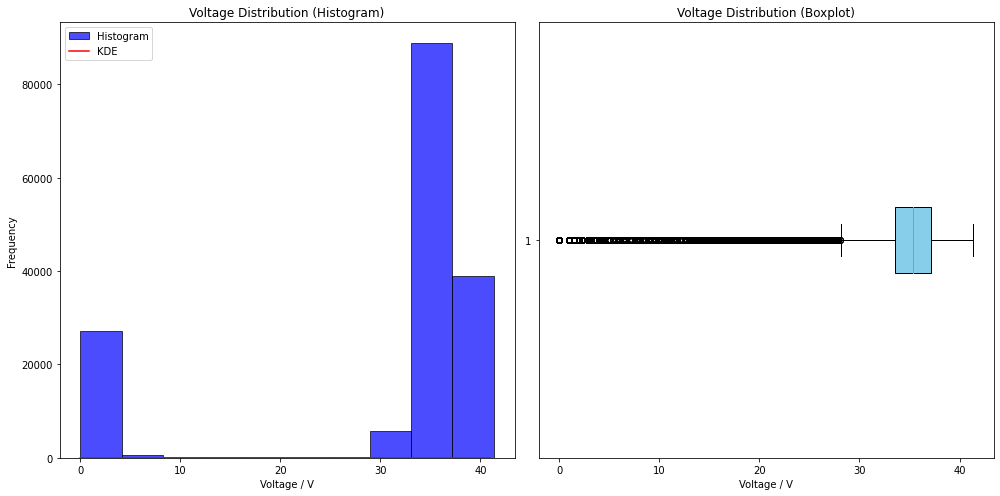

In [6]:

def inspect_Data():
    """Visualization"""
    print("Visualization")
    print()
    
inspect_Data()


# Visualization
plt.figure(figsize=(14, 7))

# Subplot 1: Histogram with KDE
plt.subplot(1, 2, 1)
# Plot histogram
plt.hist(df["Voltage / V"], bins=10, color="blue", alpha=0.7, edgecolor="black", label="Histogram")
# Plot KDE (Kernel Density Estimation)
from scipy.stats import gaussian_kde
kde = gaussian_kde(df["Voltage / V"])
x_range = range(int(min(df["Voltage / V"])), int(max(df["Voltage / V"])) + 1)
plt.plot(x_range, kde(x_range), color="red", label="KDE")
plt.title("Voltage Distribution (Histogram)")
plt.xlabel("Voltage / V")
plt.ylabel("Frequency")
plt.legend()

# Subplot 2: Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df["Voltage / V"], vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title("Voltage Distribution (Boxplot)")
plt.xlabel("Voltage / V")

# Show Plots
plt.tight_layout()
plt.show()











### Summary of the Visual Segmentation of the Signal

- The previous figure clearly reveals that the signal can be visually segmented into two distinct parts:  
  - One segment ranging approximately from 0 to 9,  
  - And another from around 28 to 45.

- This observation suggests a natural way to split the signal into two separate phases.

- To formalize this segmentation and identify the **"on"** and **"off"** states, we will apply the **k-means clustering** method.

- This approach has the advantage that we will not have to guest the cut points.


## 3. Develop a Classification Method

In [7]:
def inspect_Data():
    """K-means Clustering to Identify the "on" and "off" states"""
    print("K-means Clustering to Identify the on and off states")
    print()
    
inspect_Data()

# Extract the Voltage values for clustering
voltage_values = df["Voltage / V"].values.reshape(-1, 1)

# Perform K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(voltage_values)

# Add cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Identify which cluster corresponds to the "on" and "off" states
cluster_means = df.groupby('Cluster')["Voltage / V"].mean()
on_state_cluster = cluster_means.idxmax()  # Cluster with the higher mean voltage
off_state_cluster = cluster_means.idxmin()  # Cluster with the lower mean voltage

# Map clusters to "on" and "off" states
df['State'] = df['Cluster'].map({on_state_cluster: 'on_state', off_state_cluster: 'off_state'})

# Calculate variance for each cluster
cluster_variances = df.groupby('Cluster')["Voltage / V"].var()

# Output the results
print("On State:")
print(df[df['State'] == 'on_state'].drop(columns=['Cluster', 'State']))
print("\nOff State:")
print(df[df['State'] == 'off_state'].drop(columns=['Cluster', 'State']))
print("\nCluster Variances:")
print(cluster_variances)

# Extract the on atate as well as off state data
on_state = df[df['State'] == 'on_state'].drop(columns=['Cluster', 'State'])
off_state = df[df['State'] == 'off_state'].drop(columns=['Cluster', 'State'])


K-means Clustering to Identify the on and off states

On State:
        time / s  Voltage / V
0       0.000000    32.062439
1       0.000016    36.055511
2       0.000025    36.235344
3       0.000026    39.962482
4       0.000029    37.336311
...          ...          ...
158749  0.956155    31.400637
158750  0.956157    26.870058
158751  0.956157    23.345234
158752  0.956157    23.345234
158753  0.956158    19.209373

[134091 rows x 2 columns]

Off State:
        time / s  Voltage / V
272     0.001388    18.384775
273     0.001388    18.384775
274     0.001389    14.866070
275     0.001391    10.295630
276     0.001391     5.830952
...          ...          ...
162495  0.999935     0.000000
162496  0.999936     1.414214
162497  0.999952     1.414214
162498  0.999968     2.236068
162499  0.999984     0.000000

[28409 rows x 2 columns]

Cluster Variances:
Cluster
0    3.961374
1    4.572827
Name: Voltage / V, dtype: float64


In [8]:
# Calculate the mean voltage for both states
mean_on = on_state['Voltage / V'].mean()
mean_off = off_state['Voltage / V'].mean()

print("\nMode Classification:")
print()
print(f"Mean Voltage (On): {mean_on}")
print()
print(f"Mean Voltage (Off): {mean_off}")



Mode Classification:

Mean Voltage (On): 35.907904130979325

Mean Voltage (Off): 1.7858838460241386


 This segmentation aligns precisely with our initial visual observation, with the added advantage that it eliminates the need to subjectively determine a cutoff point.
 
 Now, let us visualize each signal state (on and off) individually.


## Visualization of the On state

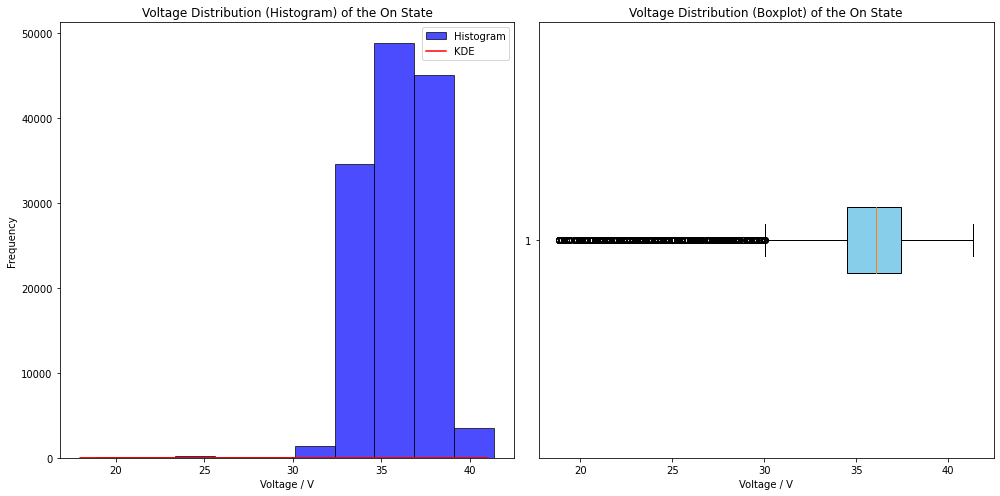

In [9]:

def inspect_Data():
    """"""
    print("")
    print()
    
inspect_Data()


# Visualiztion of the on state data    
# Visualization
plt.figure(figsize=(14, 7))

# Subplot 1: Histogram with KDE
plt.subplot(1, 2, 1)
# Plot histogram
plt.hist(on_state["Voltage / V"], bins=10, color="blue", alpha=0.7, edgecolor="black", label="Histogram")
# Plot KDE (Kernel Density Estimation)
from scipy.stats import gaussian_kde
kde = gaussian_kde(on_state["Voltage / V"])
x_range = range(int(min(on_state["Voltage / V"])), int(max(on_state["Voltage / V"])) + 1)
plt.plot(x_range, kde(x_range), color="red", label="KDE")
plt.title("Voltage Distribution (Histogram) of the On State")
plt.xlabel("Voltage / V")
plt.ylabel("Frequency")
plt.legend()

# Subplot 2: Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(on_state["Voltage / V"], vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title("Voltage Distribution (Boxplot) of the On State")
plt.xlabel("Voltage / V")

# Show Plots
plt.tight_layout()
plt.show()






- Values of the on state go from around 19 to around 45 as expected from the first histogram.

- Visually, this segment of the signal appears to exhibit an approximately symmetric distribution.

- The first and third quartiles appear to be symmetric with respect to the median, indicating a symmetrical distribution.

- While visual symmetry is a helpful initial indicator, it does not conclusively imply that the data are normally distributed.

- Formal statistical tests (e.g., the Shapiro-Wilk test) and diagnostic tools (e.g., Q-Q plots) are required to assess normality more rigorously.

- Nonetheless, visual symmetry can be a useful starting point for assuming normality, especially when preparing for inferential statistical methods that rely on this assumption.


## Visualization of the Off State

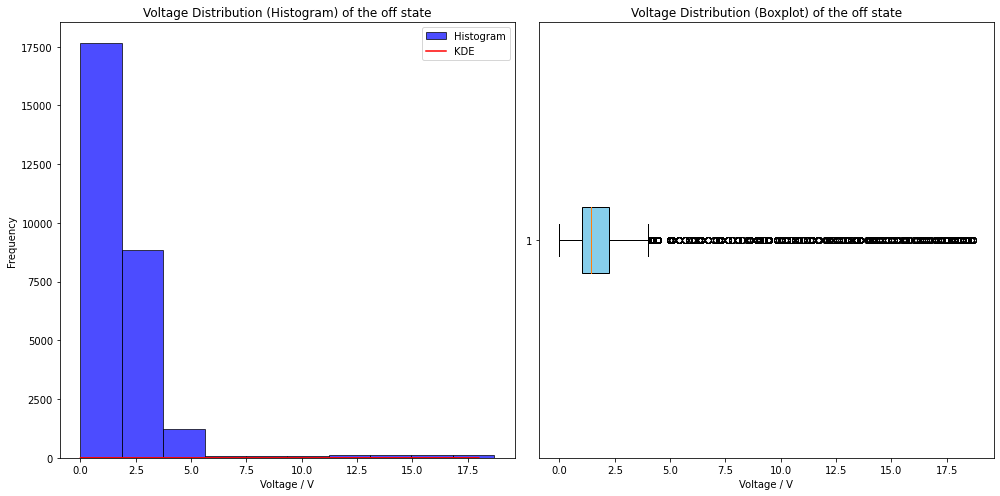

In [10]:

# Visalization of the off State Data
    
# Visualization
plt.figure(figsize=(14, 7))

# Subplot 1: Histogram with KDE
plt.subplot(1, 2, 1)
# Plot histogram
plt.hist(off_state["Voltage / V"], bins=10, color="blue", alpha=0.7, edgecolor="black", label="Histogram")
# Plot KDE (Kernel Density Estimation)
from scipy.stats import gaussian_kde
kde = gaussian_kde(off_state["Voltage / V"])
x_range = range(int(min(off_state["Voltage / V"])), int(max(off_state["Voltage / V"])) + 1)
plt.plot(x_range, kde(x_range), color="red", label="KDE")
plt.title("Voltage Distribution (Histogram) of the off state")
plt.xlabel("Voltage / V")
plt.ylabel("Frequency")
plt.legend()

# Subplot 2: Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(off_state["Voltage / V"], vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title("Voltage Distribution (Boxplot) of the off state")
plt.xlabel("Voltage / V")

# Show Plots
plt.tight_layout()
plt.show()


- Off-state values range approximately from 0 to 18, consistent with the initial histogram.

- Visually, this signal segment doesn't appear to exhibit a symmetric distribution.

- However, a log transformation is anticipated to induce normality.

- Achieving a normal distribution is crucial for developing a robust statistical model to readily detect the signal, as it's a common assumption for the intended methodology and other statistical techniques.

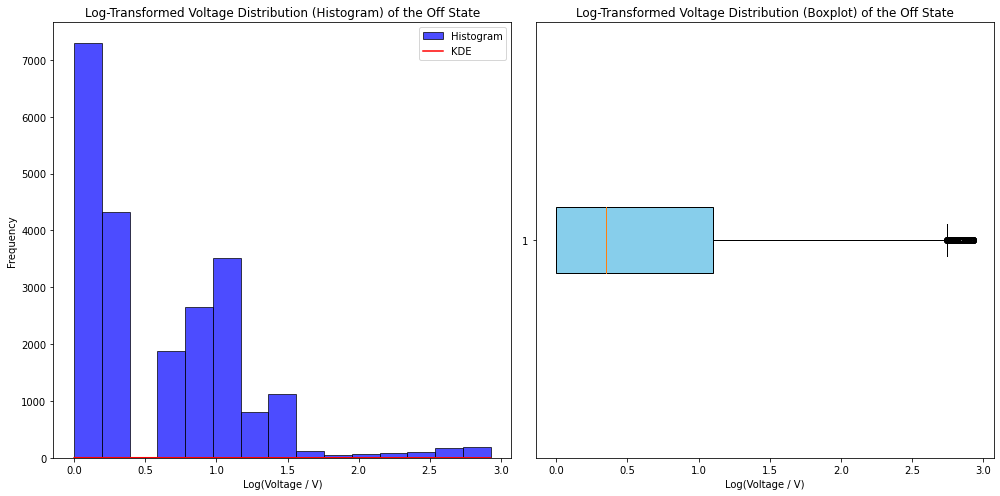

In [11]:

# --- Prepare the Data for Log Transformation ---
# Filter out any non-positive voltage values (0 or negative)
# as the logarithm is only defined for positive numbers.
# This creates a new pandas Series containing only the valid values.
positive_voltages = off_state[off_state["Voltage / V"] > 0]["Voltage / V"]

# --- Check if there's enough data to plot ---
if positive_voltages.empty:
    print("Warning: No positive voltage values found in the 'off_state' data after filtering. Cannot generate plots.")
else:
    # Apply the natural logarithm transformation
    log_transformed_voltages = np.log(positive_voltages)

    # --- Visualization Setup ---
    plt.figure(figsize=(14, 7))

    # --- Subplot 1: Histogram with KDE for Log-Transformed Data ---
    plt.subplot(1, 2, 1)
    plt.hist(log_transformed_voltages, bins=15, color="blue", alpha=0.7, edgecolor="black", label="Histogram")

    # Only attempt KDE if there's more than one unique value (i.e., data has variance)
    if log_transformed_voltages.nunique() > 1:
        kde_log = gaussian_kde(log_transformed_voltages)
        # Create a smooth range for the KDE plot based on the actual data limits
        x_range_log = np.linspace(log_transformed_voltages.min(), log_transformed_voltages.max(), 500)
        plt.plot(x_range_log, kde_log(x_range_log), color="red", label="KDE")
    else:
        print("Warning: All log-transformed voltage values are identical. KDE cannot be computed for this dataset.")

    plt.title("Log-Transformed Voltage Distribution (Histogram) of the Off State")
    plt.xlabel("Log(Voltage / V)")
    plt.ylabel("Frequency")
    plt.legend()

    # --- Subplot 2: Boxplot for Log-Transformed Data ---
    plt.subplot(1, 2, 2)
    plt.boxplot(log_transformed_voltages, vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
    plt.title("Log-Transformed Voltage Distribution (Boxplot) of the Off State")
    plt.xlabel("Log(Voltage / V)")

    # --- Display Plots ---
    plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
    plt.show()

- Even after transformation, the "Off State" data does not visually exhibit a normal distribution.

- A clear absence of visual symmetry generally indicates that a distribution is not symmetric, and therefore unlikely to be normally distributed.
- In subsequent sections, we will assume however, that we deal with fast norml data, since we have enough observations, with the central limit theorem, we consider asmptotic normal dstribution


# III. Method for Fast Mode Detection using Maximum Likelihood Estimation (MLE): Sliding Window Analysis

- In this part, we implement a fast method for mode detection using statistical techniques such as Maximum Likelihood Estimation (MLE).

- This method calculates the likelihood of the signal belonging to either the "on" or "off" state based on the observed data

- Perform MLE mode detection: For instance window_size=1000

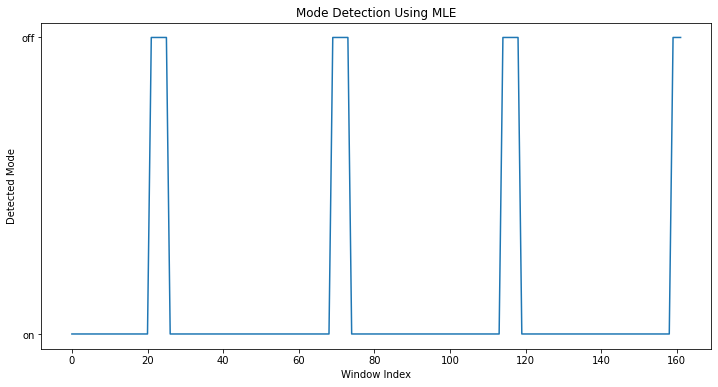

In [13]:
# Define a function to calculate MLE for Gaussian distribution
def mle_detection(df, window_size=1000):
    uncertainties = []
    for start_idx in range(0, len(df) - window_size, window_size):
        window = df[start_idx:start_idx + window_size]

        # Fit Gaussian distributions to the "on" and "off" data
        mean_on, std_on = norm.fit(on_state['Voltage / V'])
        mean_off, std_off = norm.fit(off_state['Voltage / V'])

        # Calculate likelihood for each mode (on or off)
        likelihood_on = np.sum(norm.pdf(window['Voltage / V'], mean_on, std_on))
        likelihood_off = np.sum(norm.pdf(window['Voltage / V'], mean_off, std_off))

        # Compare likelihoods to decide on the mode
        mode = 'on' if likelihood_on > likelihood_off else 'off'
        uncertainties.append(mode)

    return uncertainties

# Perform MLE mode detection
window_size=1000
uncertainties_mle = mle_detection(df, window_size)

# Plot the results of MLE-based mode detection
plt.figure(figsize=(12, 6))
plt.plot(uncertainties_mle)
plt.title('Mode Detection Using MLE')
plt.xlabel('Window Index')
plt.ylabel('Detected Mode')
plt.show()

The figure allows automatic detection visually.

# IV. Project Outlook: Advancing Signal Detection and Analysis


This project is poised for significant enhancements, focusing on increased detection accuracy, robustness, and adaptability. Key areas for future development include:

- Enriched Data Features: We'll expand our analytical scope by incorporating additional signal metadata, such as frequency characteristics, to provide a more comprehensive dataset for improved detection accuracy.

- Advanced Noise Mitigation: We plan to implement sophisticated filtering techniques, including wavelet transforms and statistical filters (e.g., Kalman or particle filters), to further refine signal quality and enhance detection precision beyond current Savitzky-Golay applications.

- Adaptive Thresholding: We'll develop dynamic thresholding mechanisms that leverage domain-specific knowledge to enable the model to adjust intelligently to varying signal conditions.

- Algorithmic Sophistication: We'll explore and integrate advanced machine learning approaches, such as Support Vector Machines (SVMs) and robust Bayesian inference (building on current decision tree implementations), to address complex non-linearities and improve classification under uncertainty.

- Contextual Robustness: We aim to analyze signal behavior across diverse environmental conditions and optimize observation window lengths to balance detection responsiveness with overall uncertainty reduction.

We would like to express our sincere gratitude to Dr. Dany Djeudeu for his valuable time and insightful guidance on this project.

### We Can Analyze Your Signal Data Professionally

### Contact Us

For your signal data analysis needs, feel free to reach out to us at:

**Email:** [info@3d-statistical-learning.com](mailto:info@3d-statistical-learning.com)